# WEEK 2: BASICS OF DATA PROCESSING

In [193]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix



In [194]:
dataset = pd.read_csv('House-Price-Prediction-clean.csv')
dataset.shape

(1460, 32)

In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [196]:
# Show first 10 rows of the dataset
dataset.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,64,796,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,317,1686,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,216,1107,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,952,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,140,991,...,0,4,0,0,0,0,0,1,2008,118000


In [197]:
# Check for missing values
dataset.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [198]:
#Generate data statistics
dataset.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


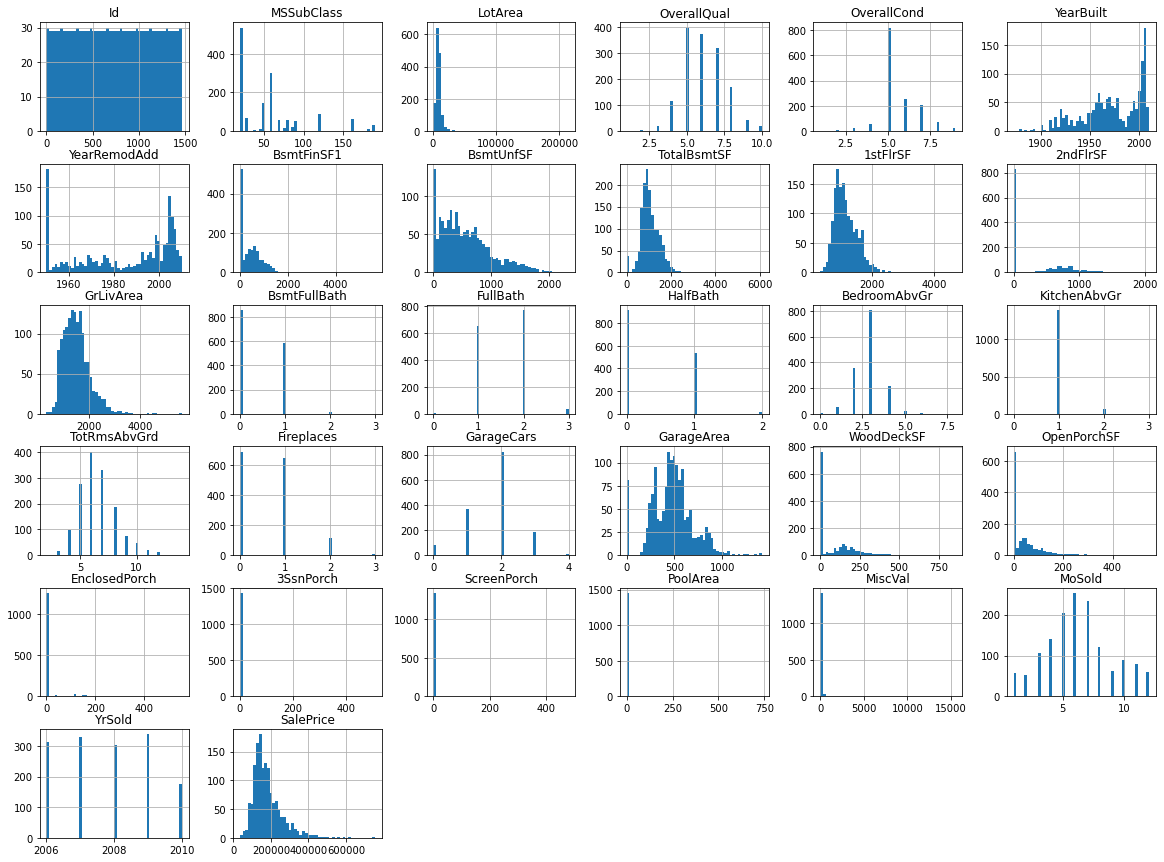

In [199]:
# Show histogram of all columns
# This histogram helps us to understand the distribution of the data
# X-axis: Value of the feature
# Y-axis: Number of instances that have a given value
dataset.hist(bins=50, figsize=(20,15))
plt.show()

/tmp/ipykernel_4376/2245903351.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True)),


(<AxesSubplot:>,)

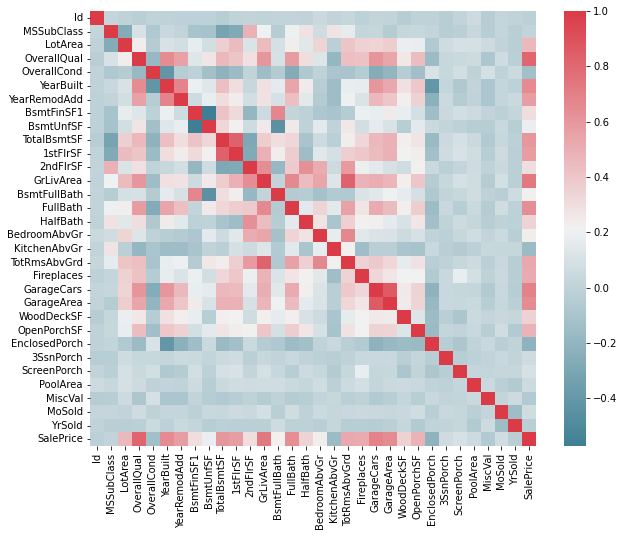

In [200]:
# Create heatmap to show correlation between features

f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr('spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True)),

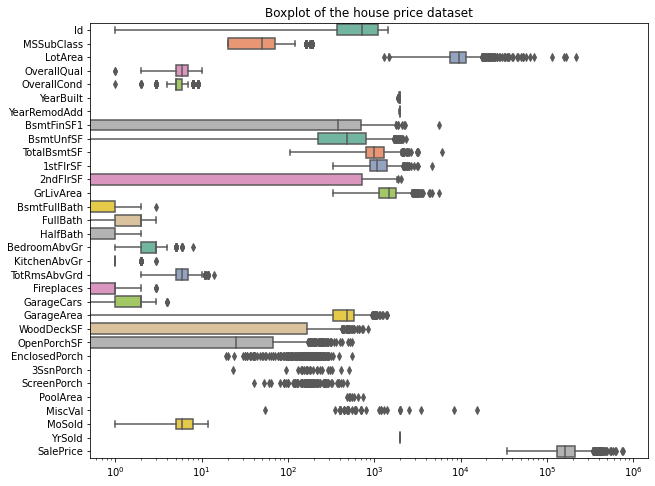

In [201]:
# sns boxplot to show the distribution of the data
# X-axis: Feature
# Y-axis: Value of the feature
plt.figure(figsize=(10, 8))
bp = sns.boxplot(data=dataset, orient="h", palette="Set2")
bp.set_title('Boxplot of the house price dataset')
bp.set(xscale=('log'))
# xscale('log') to show the distribution of the data in log scale. This is useful when the data is skewed
plt.show()



<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

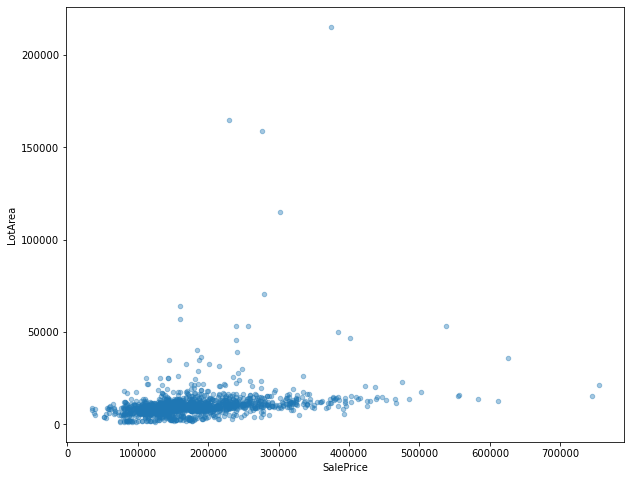

In [202]:
# Scatter plot to show the relationship between the features


# kind = scatter to show the relationship between the features
dataset.plot(kind='scatter', x='SalePrice', y='LotArea', alpha=0.4, figsize=(10, 8), cmap=plt.get_cmap('jet'),)

In [203]:
# Check dataset's corelation with SalePrice
corr_matrix = dataset.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)
# The negative correlation means that the features are inversely proportional to each other

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [204]:
# Drop features not useful for the prediction
dataset["HouseAge"] = dataset["YrSold"]-dataset["YearBuilt"]
dataset = dataset.drop(['Id', 'MiscVal', 'YrSold'], axis=1)

dataset.sort_values('SalePrice').head(10)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge
495,30,7879,4,5,1920,1950,495,225,720,720,...,0,0,523,115,0,0,0,11,34900,89
916,20,9000,2,3,1949,1950,50,430,480,480,...,308,0,0,0,0,0,0,10,35311,57
968,50,5925,3,6,1910,1950,0,600,600,600,...,0,0,0,0,0,0,0,5,37900,99
533,20,5000,1,3,1946,1950,0,0,0,334,...,0,0,0,0,0,0,0,1,39300,61
30,70,8500,4,4,1920,1950,0,649,649,649,...,250,0,54,172,0,0,0,7,40000,88
710,30,4130,3,6,1935,2003,0,270,270,729,...,0,0,0,0,0,0,0,7,52000,73
1337,30,4118,4,4,1941,1950,0,693,693,693,...,0,0,20,0,0,0,0,3,52500,65
705,190,5600,4,5,1930,1950,0,0,0,372,...,0,0,0,0,0,0,0,7,55000,80
1325,30,3636,4,4,1922,1950,0,796,796,796,...,0,0,0,100,0,0,0,1,55000,86
812,20,8712,5,5,1952,1952,0,540,540,1044,...,504,0,0,0,0,0,0,6,55993,58


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>]],
      dtype=object)

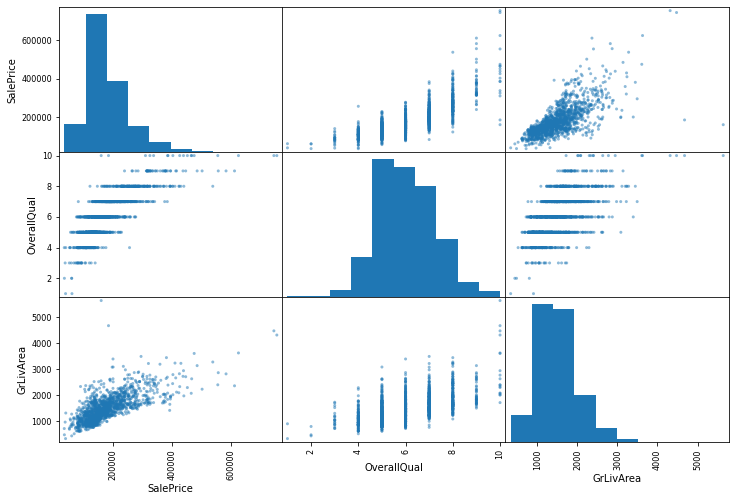

In [205]:
# Generate datasets based on the correlation with SalePrice.
# 1st dataset: top 2 features with the highest correlation with SalePrice

dataset1 = dataset[['SalePrice', 'OverallQual', 'GrLivArea']]

# Plot a scatter matrix to show the relationship between the features
scatter_matrix(dataset1, figsize=(12, 8))






array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', 

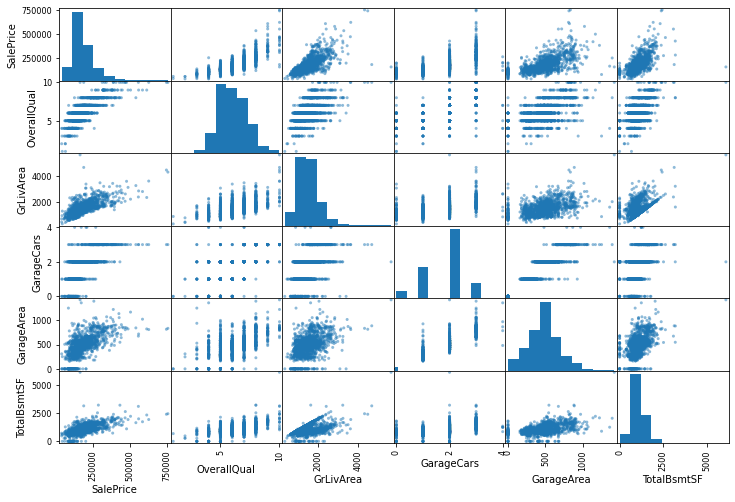

In [206]:
# 2nd dataset: top 5 features with the lowest correlation with 
dataset2 = dataset[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
scatter_matrix(dataset2, figsize=(12, 8))

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='Ov

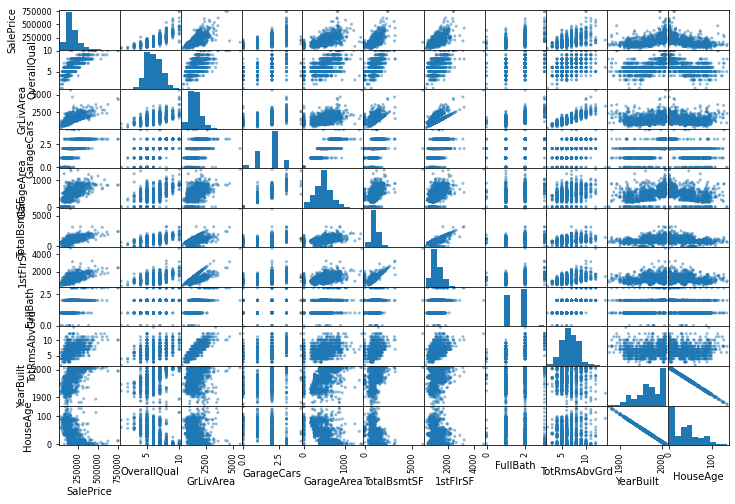

In [207]:
# 3rd dataset: top 10 features with the highest correlation with SalePrice
dataset3 = dataset[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'HouseAge']]
scatter_matrix(dataset3, figsize=(12, 8))

# WEEK 3: GETTING STARTED WITH SKLEARN

In [208]:
from sklearn.model_selection import train_test_split

# Extract the features and the labels from the main dataset
X = dataset.drop('SalePrice',1)
y = dataset['SalePrice']

# Split the main dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Extract the features and the labels from the dataset1
X1 = dataset1.drop('SalePrice',1)
y1 = dataset1['SalePrice']

# Split the dataset1 into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

# Extract the features and the labels from the dataset2
X2 = dataset2.drop('SalePrice',1)
y2 = dataset2['SalePrice']

# Split the dataset2 into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Extract the features and the labels from the dataset3
X3 = dataset3.drop('SalePrice',1)
y3 = dataset3['SalePrice']

# Split the dataset3 into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)



/tmp/ipykernel_4376/4000196131.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('SalePrice',1)
/tmp/ipykernel_4376/4000196131.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1 = dataset1.drop('SalePrice',1)
/tmp/ipykernel_4376/4000196131.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = dataset2.drop('SalePrice',1)
/tmp/ipykernel_4376/4000196131.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X3 = dataset3.drop('SalePrice',1)


In [209]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [210]:
# Main Dataset
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred)
print('R2 score for Linear Regression: ', r2_lr)

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
r2_dtr = r2_score(y_test, y_pred)
print('R2 score for Decision Tree: ', r2_dtr)

# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_rfr = r2_score(y_test, y_pred)
print('R2 score for Random Forest: ', r2_rfr)

R2 score for Linear Regression:  0.6434573722626937
R2 score for Decision Tree:  0.797930363645957
R2 score for Random Forest:  0.8487996468343212


In [211]:
# Dataset1
# Linear Regression

lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
y1_pred = lr1.predict(X1_test)
r2_lr1 = r2_score(y1_test, y1_pred)
print('R2 score for Linear Regression: ', r2_lr1)

# Decision Tree Regressor
dtr1 = DecisionTreeRegressor()
dtr1.fit(X1_train, y1_train)
y1_pred = dtr1.predict(X1_test)
r2_dtr1 = r2_score(y1_test, y1_pred)
print('R2 score for Decision Tree: ', r2_dtr1)

# Random Forest Regressor
rfr1 = RandomForestRegressor()
rfr1.fit(X1_train, y1_train)
y1_pred = rfr1.predict(X1_test)
r2_rfr1 = r2_score(y1_test, y1_pred)
print('R2 score for Random Forest: ', r2_rfr1)

R2 score for Linear Regression:  0.675036216256019
R2 score for Decision Tree:  0.6975057829960203
R2 score for Random Forest:  0.760779640335386


In [212]:
# Dataset2
# Linear Regression

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)
r2_lr2 = r2_score(y2_test, y2_pred)
print('R2 score for Linear Regression: ', r2_lr2)

# Decision Tree Regressor
dtr2 = DecisionTreeRegressor()
dtr2.fit(X2_train, y2_train)
y2_pred = dtr2.predict(X2_test)
r2_dtr2 = r2_score(y2_test, y2_pred)
print('R2 score for Decision Tree: ', r2_dtr2)

# Random Forest Regressor
rfr2 = RandomForestRegressor()
rfr2.fit(X2_train, y2_train)
y2_pred = rfr2.predict(X2_test)
r2_rfr2 = r2_score(y2_test, y2_pred)
print('R2 score for Random Forest: ', r2_rfr2)

R2 score for Linear Regression:  0.6370695035608209
R2 score for Decision Tree:  0.745880335602604
R2 score for Random Forest:  0.8333766669995026


In [213]:
# Dataset3
# Linear Regression

lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)
y3_pred = lr3.predict(X3_test)
r2_lr3 = r2_score(y3_test, y3_pred)
print('R2 score for Linear Regression: ', r2_lr3)

# Decision Tree Regressor
dtr3 = DecisionTreeRegressor()
dtr3.fit(X3_train, y3_train)
y3_pred = dtr3.predict(X3_test)
r2_dtr3 = r2_score(y3_test, y3_pred)
print('R2 score for Decision Tree: ', r2_dtr3)

# Random Forest Regressor
rfr3 = RandomForestRegressor()
rfr3.fit(X3_train, y3_train)
y3_pred = rfr3.predict(X3_test)
r2_rfr3 = r2_score(y3_test, y3_pred)
print('R2 score for Random Forest: ', r2_rfr3)

R2 score for Linear Regression:  0.6371769831801081
R2 score for Decision Tree:  0.7583019844158057
R2 score for Random Forest:  0.8528529848461572


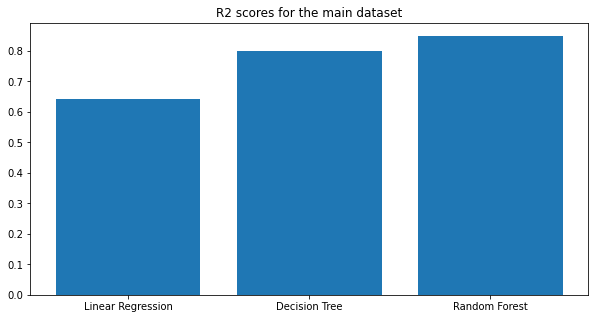

In [214]:
# Plot the R2 scores for the main dataset
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Decision Tree', 'Random Forest'], [r2_lr, r2_dtr, r2_rfr])
plt.title('R2 scores for the main dataset')
plt.show() 

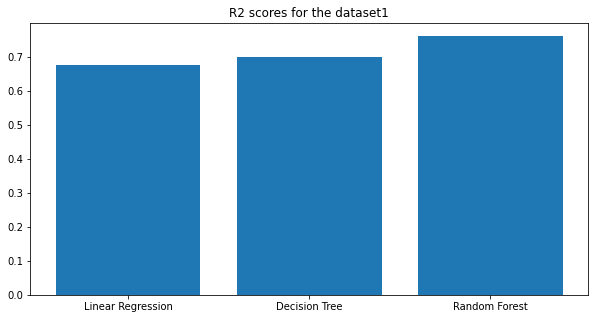

In [215]:
# Plot the R2 scores for the dataset1
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Decision Tree', 'Random Forest'], [r2_lr1, r2_dtr1, r2_rfr1])
plt.title('R2 scores for the dataset1')
plt.show()

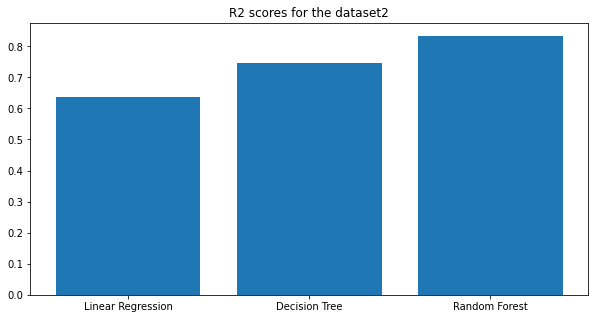

In [216]:
# Plot the R2 scores for the dataset2
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Decision Tree', 'Random Forest'], [r2_lr2, r2_dtr2, r2_rfr2])
plt.title('R2 scores for the dataset2')
plt.show()

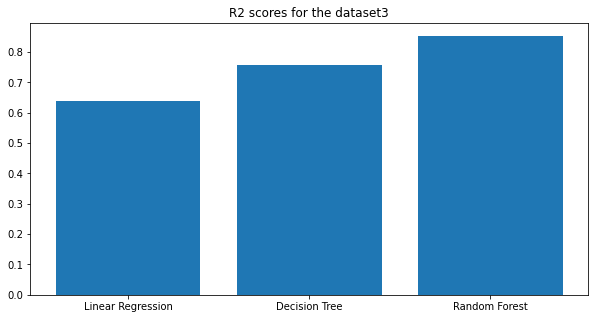

In [217]:
# Plot the R2 scores for the dataset3
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Decision Tree', 'Random Forest'], [r2_lr3, r2_dtr3, r2_rfr3])
plt.title('R2 scores for the dataset3')
plt.show()

In [218]:
# Tabulate the R2 scores for all the datasets
data = {'Dataset': ['Main Dataset', 'Dataset1', 'Dataset2', 'Dataset3'],
        'Number of features': [X.shape[1], X1.shape[1], X2.shape[1], X3.shape[1]],
        'Linear Regression': [r2_lr, r2_lr1, r2_lr2, r2_lr3],
        'Decision Tree': [r2_dtr, r2_dtr1, r2_dtr2, r2_dtr3],
        'Random Forest': [r2_rfr, r2_rfr1, r2_rfr2, r2_rfr3]}
df = pd.DataFrame(data)
df

,Dataset,Number of features,Linear Regression,Decision Tree,Random Forest
0,Main Dataset,29,0.643457,0.797930,0.848800
1,Dataset1,2,0.675036,0.697506,0.760780
2,Dataset2,5,0.637070,0.745880,0.833377
3,Dataset3,10,0.637177,0.758302,0.852853


# WEEK 4

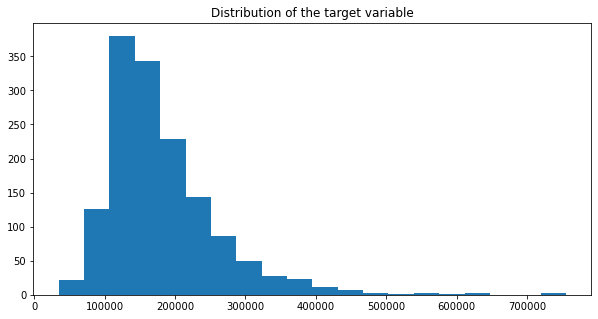

In [219]:
# Discretize the target variable by first looking at the distribution of the target variable

# Plot the distribution of the target variable
plt.figure(figsize=(10, 5))
plt.hist(dataset['SalePrice'], bins=20)
plt.title('Distribution of the target variable')
plt.show() 


In [220]:
# From the distribution of the target variable, we can see that it is skewed to the right
# We can discretize the target variable into 8 categories with equal width (bins)

# Discretize the target variable
dataset['SalePriceCategory'] = pd.cut(dataset['SalePrice'], 8, labels=[1,2,3,4,5,6,7,8])
dataset['SalePriceCategory'].value_counts()



2    799
1    301
3    250
4     80
5     20
6      5
7      3
8      2
Name: SalePriceCategory, dtype: int64

In [221]:
# Dataset head last 3 columns
dataset.iloc[:, -3:].head()

,SalePrice,HouseAge,SalePriceCategory
0,208500,5,2
1,181500,31,2
2,223500,7,3
3,140000,91,2
4,250000,8,3


In [222]:
from sklearn.metrics import accuracy_score

# Drop the target variable since we have already created a new target variable i.e SalePriceCategory
dataset.drop('SalePrice', axis=1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,HouseAge,SalePriceCategory
0,60,8450,7,5,2003,2003,706,150,856,856,...,548,0,61,0,0,0,0,2,5,2
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,460,298,0,0,0,0,0,5,31,2
2,60,11250,7,5,2001,2002,486,434,920,920,...,608,0,42,0,0,0,0,9,7,3
3,70,9550,7,5,1915,1970,216,540,756,961,...,642,0,35,272,0,0,0,2,91,2
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,836,192,84,0,0,0,0,12,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,953,953,953,...,460,0,40,0,0,0,0,8,8,2
1456,20,13175,6,6,1978,1988,790,589,1542,2073,...,500,349,0,0,0,0,0,2,32,2
1457,70,9042,7,9,1941,2006,275,877,1152,1188,...,252,0,60,0,0,0,0,5,69,3
1458,20,9717,5,6,1950,1996,49,0,1078,1078,...,240,366,0,112,0,0,0,4,60,2


In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn import metrics

# Split the dataset into train and test and classify based on the equal width bins
X = dataset.drop('SalePriceCategory', axis=1)
y = dataset['SalePriceCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [224]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred)
print('Accuracy score for Random Forest Classifier: ', acc_rfc)

Accuracy score for Random Forest Classifier:  0.9623287671232876


In [225]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred)
print('Accuracy score for Decision Tree Classifier: ', acc_dtc)

Accuracy score for Decision Tree Classifier:  0.9897260273972602


In [226]:
confusion_matrix(y_test, y_pred)

array([[ 75,   0,   0,   0,   0,   0,   0,   0],
       [  0, 149,   0,   0,   0,   0,   0,   0],
       [  0,   0,  42,   0,   0,   0,   0,   0],
       [  0,   0,   0,  19,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0]])

In [227]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

    accuracy                           0.99       292
   macro avg       0.69      0.75      0.71       292
weighted avg       0.99      0.99      0.99       292



/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
# Diferrent test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Create trainin and test sets for different test sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=60)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=test_sizes[0], random_state=60)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=test_sizes[1], random_state=60)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=test_sizes[2], random_state=60)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=test_sizes[3], random_state=60)

In [229]:
# Random Forest Classifier
rfc1 = RandomForestClassifier(n_estimators=300)

# Test size 0.1
rfc1.fit(X_train1, y_train1)
y_pred1 = rfc1.predict(X_test1)
acc_rfc1 = accuracy_score(y_test1, y_pred1)
print('Accuracy score for Random Forest Classifier with test size 0.1: ', acc_rfc1)

# Test size 0.2
rfc1.fit(X_train2, y_train2)
y_pred2 = rfc1.predict(X_test2)
acc_rfc2 = accuracy_score(y_test2, y_pred2)
print('Accuracy score for Random Forest Classifier with test size 0.2: ', acc_rfc2)

# Test size 0.3
rfc1.fit(X_train3, y_train3)
y_pred3 = rfc1.predict(X_test3)
acc_rfc3 = accuracy_score(y_test3, y_pred3)
print('Accuracy score for Random Forest Classifier with test size 0.3: ', acc_rfc3)

# Test size 0.4
rfc1.fit(X_train4, y_train4)
y_pred4 = rfc1.predict(X_test4)
acc_rfc4 = accuracy_score(y_test4, y_pred4)
print('Accuracy score for Random Forest Classifier with test size 0.4: ', acc_rfc4)

# Test size 0.5
rfc1.fit(X_train, y_train)
y_pred = rfc1.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred)
print('Accuracy score for Random Forest Classifier with test size 0.1: ', acc_rfc)

# Tabulate the accuracy scores for different test sizes
data = {'Test Size': test_sizes,
        'Accuracy Score': [acc_rfc1, acc_rfc2, acc_rfc3, acc_rfc4,acc_rfc]}
df = pd.DataFrame(data)
df

Accuracy score for Random Forest Classifier with test size 0.1:  0.9794520547945206
Accuracy score for Random Forest Classifier with test size 0.2:  0.9623287671232876
Accuracy score for Random Forest Classifier with test size 0.3:  0.9634703196347032
Accuracy score for Random Forest Classifier with test size 0.4:  0.9691780821917808
Accuracy score for Random Forest Classifier with test size 0.1:  0.9657534246575342


,Test Size,Accuracy Score
0,0.1,0.979452
1,0.2,0.962329
2,0.3,0.963470
3,0.4,0.969178
4,0.5,0.965753


In [230]:
# K-Fold Cross Validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn import svm

# Create a list of models
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=60)

# enumerate splits in loop
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print('\n{} of kfold {}, TrainSet: {}, TestSet: {}'.format(i+1, kf.n_splits, len(train_index), len(test_index)))
    



1 of kfold 10, TrainSet: 1314, TestSet: 146

2 of kfold 10, TrainSet: 1314, TestSet: 146

3 of kfold 10, TrainSet: 1314, TestSet: 146

4 of kfold 10, TrainSet: 1314, TestSet: 146

5 of kfold 10, TrainSet: 1314, TestSet: 146

6 of kfold 10, TrainSet: 1314, TestSet: 146

7 of kfold 10, TrainSet: 1314, TestSet: 146

8 of kfold 10, TrainSet: 1314, TestSet: 146

9 of kfold 10, TrainSet: 1314, TestSet: 146

10 of kfold 10, TrainSet: 1314, TestSet: 146


/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [231]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [232]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")

#Tabulate kfold cross validation results for every fold
data = {'Fold': [1,2,3,4,5,6,7,8,9,10,'Average'],
        'Accuracy Score': np.append(score,[score.mean()])}
df = pd.DataFrame(data) 
df

/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


,Fold,Accuracy Score
0,1,0.972603
1,2,0.986301
2,3,0.986301
3,4,0.931507
4,5,0.972603
5,6,0.945205
6,7,0.972603
7,8,0.972603
8,9,0.972603
9,10,0.945205


# WEEK 7

In [233]:
from sklearn.cluster import KMeans

# Clustering using K-Means for the dataset
# We use features with high magnitude

# Select the features with high magnitude
X_2f = X_train[["OpenPorchSF", "HouseAge"]]


In [234]:
X_2f

,OpenPorchSF,HouseAge
662,0,41
1256,36,14
274,0,25
903,60,0
295,0,22
...,...,...
99,0,51
399,168,3
1418,88,45
1089,84,1


In [235]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_2f)
y_pred

array([0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 3, 1, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 3, 2, 2,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2,
       2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,

In [236]:
kmeans.cluster_centers_

array([[  4.15168539,  50.50561798],
       [133.37735849,  27.6509434 ],
       [ 51.0766129 ,  13.74596774],
       [290.6       ,  42.4       ]])

In [237]:
def plot_data(X):
    plt.plot(X["OpenPorchSF"], X["HouseAge"], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    print(mins)
    print(maxs)
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

OpenPorchSF   -0.1
HouseAge      -0.1
dtype: float64
OpenPorchSF    523.1
HouseAge       135.1
dtype: float64


/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


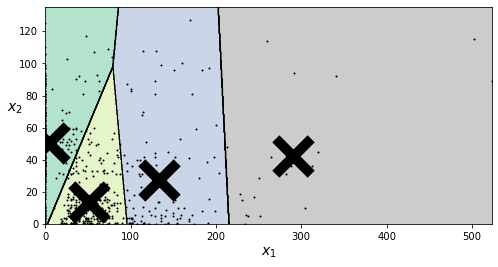

In [238]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_2f)
plt.show()

OpenPorchSF   -0.1
HouseAge      -0.1
dtype: float64
OpenPorchSF    523.1
HouseAge       135.1
dtype: float64


/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


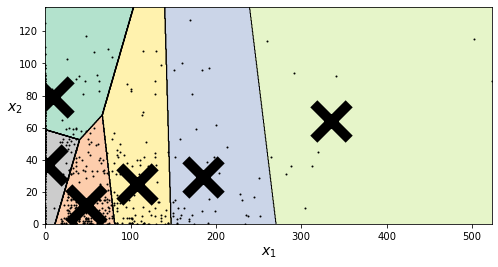

In [239]:
# Using different number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)
y_pred = kmeans.fit_predict(X_2f)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_2f)
plt.show()

OpenPorchSF   -0.1
HouseAge      -0.1
dtype: float64
OpenPorchSF    523.1
HouseAge       135.1
dtype: float64


/home/mbogi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


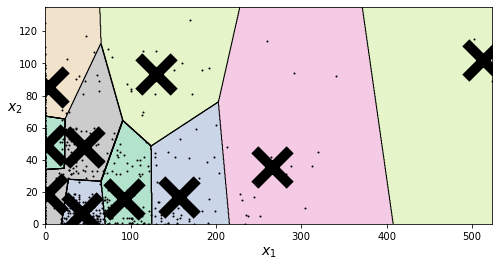

In [240]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X_2f)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_2f)
plt.show()

In [241]:
# We can see the clusters are not well defined. This is because the features are not well distributed. 
# K-Means still manages to divide clusters, with deciding features being the OpenPorchSF.

# WEEK 10

# Image Classifier using the Smiley Dataset

In [242]:
import tensorflow as tf
from tensorflow import keras

In [243]:
X = np.load('smiley_X.npy')
y = np.load('smiley_y.npy')

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

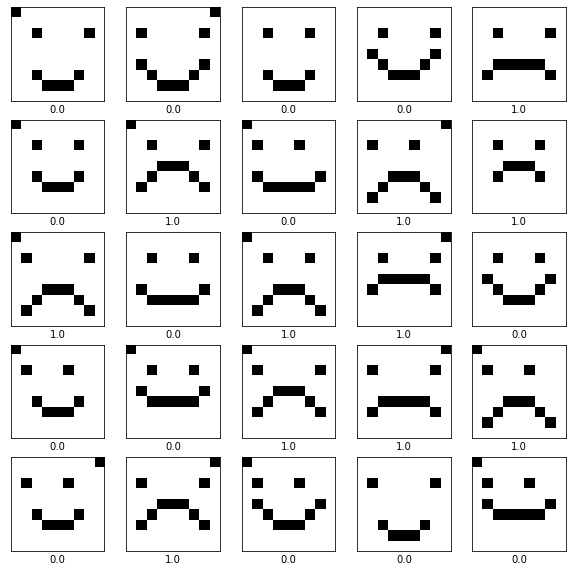

In [245]:
# Visualize the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [246]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,9,1)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 81)                0         
                                                                 
 dense_22 (Dense)            (None, 300)               24600     
                                                                 
 dense_23 (Dense)            (None, 100)               30100     
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 55,710
Trainable params: 55,710
Non-trainable params: 0
_________________________________________________________________


In [247]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
1/3 [=========>....................] - ETA: 0s - loss: 2.1683 - accuracy: 0.2500WARNING:tensorflow:6 out of the last 408 calls to <function Model.make_test_function.<locals>.test_function at 0x7fb9e3350a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - 0s 69ms/step - loss: 2.1553 - accuracy: 0.2674 - val_loss: 2.1392 - val_accuracy: 0.2586
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 2.0752 - accuracy: 0.3953 - val_loss: 2.0676 - val_accuracy: 0.5172
Epoch 3/30
3/3 [==============================] - 0s 14ms/step - loss: 1.9962 - accuracy: 0.6163 - val_loss: 1.9963 - val_accuracy: 0.7069
Epoch 4/30
3/3 [==============================] - 0s 14ms/step - loss: 1.9177 - accuracy: 0.7674 - val_loss: 1.9244 - val_accuracy: 0.7241
Epoch 5/30
3/3 [==============================] - 0s 13ms/step - loss: 1.8387 - accuracy: 0.8140 - val_loss: 1.8522 - val_accuracy: 0.7241
Epoch 6/30
3/3 [==============================] - 0s 16ms/step - loss: 1.7606 - accuracy: 0.8023 - val_loss: 1.7790 - val_accuracy: 0.7241
Epoch 7/30
3/3 [==============================] - 0s 13ms/step - loss: 1.6813 - accuracy: 0.8256 - val_loss: 1.7050 - val_accuracy: 0.7241
Epoch 8/30
3/3 [======================

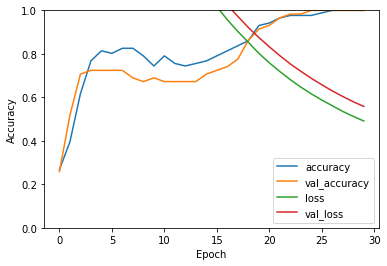

In [248]:
# Visualize the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

# Visualize the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')



In [249]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

2/2 - 0s - loss: 0.5582 - accuracy: 1.0000 - 22ms/epoch - 11ms/step


In [250]:
# Predict the model
X_test_sample = X_test[3:9]
predictions = model.predict(X_test_sample)
predictions

1/1 [==============================] - 0s 45ms/step


array([[0.300923  , 0.49654645, 0.0243264 , 0.02291657, 0.02053466,
        0.0297317 , 0.02807424, 0.02115648, 0.02913495, 0.02665561],
       [0.3465526 , 0.48962638, 0.02276869, 0.01696831, 0.01448817,
        0.02457801, 0.02387722, 0.01600274, 0.02630339, 0.01883453],
       [0.49203423, 0.43141714, 0.00978577, 0.00984338, 0.00586072,
        0.00850911, 0.01045746, 0.00694088, 0.01156253, 0.01358877],
       [0.2487177 , 0.59272087, 0.02423124, 0.02100071, 0.01680599,
        0.02118728, 0.01490989, 0.0144653 , 0.02195613, 0.02400499],
       [0.2872651 , 0.49784663, 0.02502139, 0.02461906, 0.02294214,
        0.03060266, 0.02976928, 0.02274134, 0.03119269, 0.02799981],
       [0.2705998 , 0.53494185, 0.0297114 , 0.02333621, 0.02079255,
        0.02713845, 0.01954908, 0.01730615, 0.02995472, 0.02666974]],
      dtype=float32)

In [251]:
# Y-predicted
y_pred = np.argmax(predictions, axis=1)
y_pred


array([1, 1, 0, 1, 1, 1])

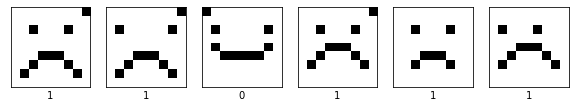

In [252]:
# Compare predicted labels with test data
plt.figure(figsize=(10, 10))
for i, image in enumerate(X_test_sample):
    plt.subplot(1, len(X_test_sample), i + 1)
    plt.xticks([])
    plt.grid(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
plt.show()

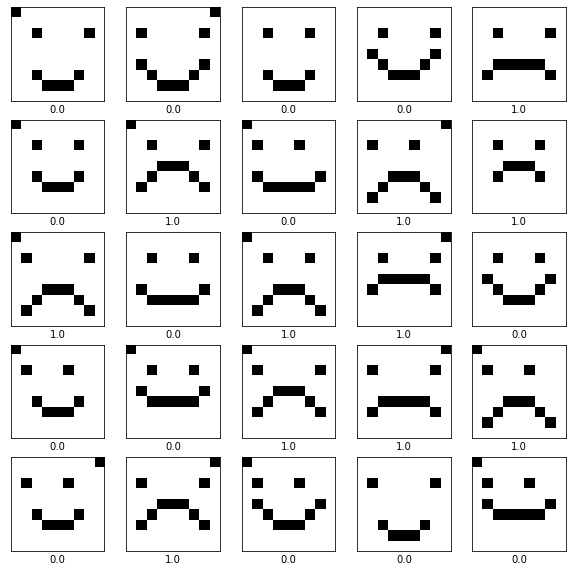

In [253]:
# DEEP MLP

# Plot X_train data

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.grid(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [254]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)        

In [255]:
# Build the model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

# Train the model
expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])




Epoch 1/30
3/3 [==============================] - 0s 71ms/step - loss: 2.2923 - accuracy: 0.0465 - val_loss: 2.2040 - val_accuracy: 0.1034
Epoch 2/30
1/3 [=========>....................] - ETA: 0s - loss: 2.2468 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0012s vs `on_train_batch_end` time: 0.0013s). Check your callbacks.


3/3 [==============================] - 0s 15ms/step - loss: 2.1908 - accuracy: 0.2326 - val_loss: 2.1095 - val_accuracy: 0.3276
Epoch 3/30
3/3 [==============================] - 0s 15ms/step - loss: 2.0927 - accuracy: 0.4070 - val_loss: 2.0167 - val_accuracy: 0.5172
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 1.9979 - accuracy: 0.4767 - val_loss: 1.9254 - val_accuracy: 0.6034
Epoch 5/30
3/3 [==============================] - 0s 14ms/step - loss: 1.9044 - accuracy: 0.5814 - val_loss: 1.8346 - val_accuracy: 0.6207
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 1.8126 - accuracy: 0.6047 - val_loss: 1.7439 - val_accuracy: 0.6897
Epoch 7/30
3/3 [==============================] - 0s 13ms/step - loss: 1.7195 - accuracy: 0.6279 - val_loss: 1.6539 - val_accuracy: 0.7586
Epoch 8/30
3/3 [==============================] - 0s 14ms/step - loss: 1.6260 - accuracy: 0.6628 - val_loss: 1.5635 - val_accuracy: 0.7759
Epoch 9/30
3/3 [======================

Text(0, 0.5, 'Loss')

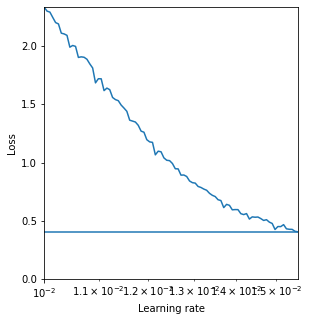

In [256]:
# Visualize loss and learning rate

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [257]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9,9,1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [258]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
3/3 [==============================] - 0s 82ms/step - loss: 1.6222 - accuracy: 0.5698 - val_loss: 0.6015 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.4919 - accuracy: 0.8372 - val_loss: 0.9231 - val_accuracy: 0.5517
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 1.0845 - accuracy: 0.5930 - val_loss: 0.2437 - val_accuracy: 0.9483
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1712 - accuracy: 0.9884 - val_loss: 0.0937 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0680 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 8/100
3/3 [===

In [259]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 6.0225e-04 - accuracy: 1.0000


[0.0006022544694133103, 1.0]

# WEEK 11

In [295]:
X = np.load('smiley_X.npy')
Y = np.load('smiley_y.npy')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


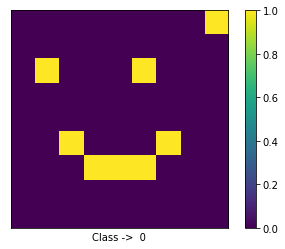

In [296]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel("Class ->  {}".format(int(y_train[0])))
plt.show()





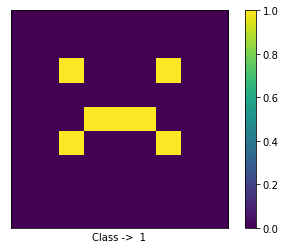

In [297]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel("Class ->  {}".format(int(y_train[5])))
plt.show()

In [298]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
                optimizer='adam',
                metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 2ms/step - loss: 2.1322 - accuracy: 0.3304
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 1.5870 - accuracy: 0.9652
Epoch 3/30
4/4 [==============================] - 0s 2ms/step - loss: 1.0566 - accuracy: 0.9826
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.9913
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 1.0000
Epoch 8/30
4/4 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 1.0000
Epoch 9/30
4/4 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 10/30
4/4 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 11/30
4/4 [======================

In [299]:
test_acc, test_loss = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 105ms/step - loss: 8.1515e-04 - accuracy: 1.0000


In [300]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [301]:
#CNN Model with smiley dataset

X_train = X_train.reshape(X_train.shape[0], 9, 9, 1)
X_test = X_test.reshape(X_test.shape[0], 9, 9, 1)

X_train.shape

(115, 9, 9, 1)

In [302]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(9, 9, 1)),
    keras.layers.MaxPooling2D(pool_size=(1, 1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)             

In [303]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 2.1228 - accuracy: 0.6696
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 1.5532 - accuracy: 0.8348
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8813 - accuracy: 0.7913
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.9391
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.9217
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2100 - accuracy: 0.9130
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1508 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1082 - accuracy: 0.9652
Epoch 9/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0824 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 1.0000


In [304]:
#Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 115ms/step - loss: 0.0447 - accuracy: 1.0000
Test accuracy: 1.0


In [309]:
predictions = model.predict(X_test)
np.argmax(predictions[7])

1/1 [==============================] - 0s 18ms/step


0

1/1 [==============================] - 0s 22ms/step


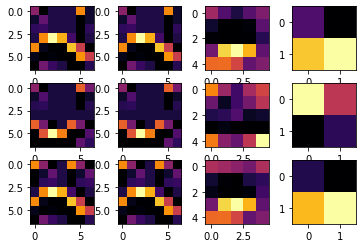

In [310]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 9, 9))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 9, 9))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 9, 9))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)